In [1]:
# Importing useful libraries

import pandas as pd # For dataframe related tasks
import warnings # Filtering some warnings
import matplotlib.pyplot as plt # For data visualizations
import seaborn as sns # For data visualizations

# Removing warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

df = pd.read_csv('TestSheet-2.csv')
df.head()

,Invoice,Silo,Status,Client,Market,Position,Start,Stop,Dur,Elap,...,CPL-ACT,Dur-C,Elap-C,Target,Leads,Gross,CPL-G,C-Actual,CPL-A,CLF
0,160995,S41,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,...,29.28,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
1,160995,S26,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,...,17.21,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
2,160995,S05,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,...,27.00,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
3,160995,S01,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,...,29.62,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
4,160925,S01,Running,E-Line,Hiring Area - OTR,Driver / Drivers,1/1,1/31,31,18,...,91.25,31,18,5,9,700.0,45.16,181.25,20.14,3.10


In [3]:
# Checking the columns

df.columns

Index(['Invoice', 'Silo', 'Status', 'Client', 'Market', 'Position', 'Start',
       'Stop', 'Dur', 'Elap', 'Ad-Leads', 'Budget', 'Actual', 'CPL-TRAE',
       'CPL-ACT', 'Dur-C', 'Elap-C', 'Target', 'Leads', 'Gross', 'CPL-G',
       'C-Actual', 'CPL-A', 'CLF'],
      dtype='object')

In [4]:
# Let us select useful columns

useful_columns = list(df.columns)
columns_to_be_removed = [
        'CPL-TRAE',
       'CPL-ACT', 
        'Dur-C', 
        'Elap-C',
        'C-Actual', 
        'CPL-A', 
        'CLF'
]

for column in columns_to_be_removed:
    useful_columns.remove(column)
    
useful_columns

['Invoice',
 'Silo',
 'Status',
 'Client',
 'Market',
 'Position',
 'Start',
 'Stop',
 'Dur',
 'Elap',
 'Ad-Leads',
 'Budget',
 'Actual',
 'Target',
 'Leads',
 'Gross',
 'CPL-G']

In [5]:
# Let us now take only our useful columns and create a new dataframe

df = df[useful_columns]
df.head()

,Invoice,Silo,Status,Client,Market,Position,Start,Stop,Dur,Elap,Ad-Leads,Budget,Actual,Target,Leads,Gross,CPL-G
0,160995,S41,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,6,600,175.69,59,190,6995.0,21.38
1,160995,S26,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,10,700,172.06,59,190,6995.0,21.38
2,160995,S05,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,5,400,135.00,59,190,6995.0,21.38
3,160995,S01,Running,K-Line,All Inclusive,Driver / Drivers,1/1,1/31,31,18,25,2500,740.42,59,190,6995.0,21.38
4,160925,S01,Running,E-Line,Hiring Area - OTR,Driver / Drivers,1/1,1/31,31,18,1,200,91.25,5,9,700.0,45.16


In [6]:
# Let us see the type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Invoice   10 non-null     int64  
 1   Silo      10 non-null     object 
 2   Status    10 non-null     object 
 3   Client    10 non-null     object 
 4   Market    10 non-null     object 
 5   Position  10 non-null     object 
 6   Start     10 non-null     object 
 7   Stop      10 non-null     object 
 8   Dur       10 non-null     int64  
 9   Elap      10 non-null     int64  
 10  Ad-Leads  10 non-null     int64  
 11  Budget    10 non-null     int64  
 12  Actual    10 non-null     float64
 13  Target    10 non-null     int64  
 14  Leads     10 non-null     int64  
 15  Gross     10 non-null     float64
 16  CPL-G     10 non-null     float64
dtypes: float64(3), int64(7), object(7)
memory usage: 1.5+ KB


In [7]:
# Let us change some columns to date time and the invoice into object

df['Invoice'] = df['Invoice'].astype('object')
df['Start'] = pd.to_datetime(df['Start']+'/2023', format='%m/%d/%Y')
df['Stop'] = pd.to_datetime(df['Stop']+'/2023', format='%m/%d/%Y')

In [8]:
# Let us see all unique values in our non-numerical columns

for column in useful_columns:
    if df[column].dtype == 'O':
        print(f"Unique values in {column} column are:\
        {df[column].unique()}")

Unique values in Invoice column are:        [160995 160925 160974]
Unique values in Silo column are:        ['S41' 'S26' 'S05' 'S01' 'S09' 'S07' 'S08' 'S03']
Unique values in Status column are:        ['Running' 'New' 'Submitted']
Unique values in Client column are:        ['K-Line' 'E-Line' 'U-Line']
Unique values in Market column are:        ['All Inclusive' 'Hiring Area - OTR' 'Portland OR - Relocation']
Unique values in Position column are:        ['Driver / Drivers']


In [9]:
# Let us see statstical values of our numerical values

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

,Dur,Elap,Ad-Leads,Budget,Actual,Target,Leads,Gross,CPL-G
count,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,31.0,18.0,15.000000,1310.000000,212.018000,91.100000,341.400000,12365.625000,23.493000
std,0.0,0.0,25.042187,1955.306171,242.491194,48.001042,204.978698,7235.874334,7.617562
min,31.0,18.0,0.000000,100.000000,0.000000,5.000000,9.000000,700.000000,20.850000
25%,31.0,18.0,2.000000,250.000000,22.812500,59.000000,190.000000,6995.000000,20.850000
50%,31.0,18.0,6.500000,650.000000,153.530000,96.500000,359.500000,12995.125000,21.115000
75%,31.0,18.0,12.250000,1000.000000,273.242500,134.000000,529.000000,18995.250000,21.380000
max,31.0,18.0,83.000000,6500.000000,740.420000,134.000000,529.000000,18995.250000,45.160000


We can see from above that 
- Duration is 31 for all over the rows
- Elapsed time is 18 for all over the rows
- Budget varies from min of 100 USD to maximum of 6500 USD
- The actual spent budget varies from min of 0 to max of 740 USD
- The target lead varies from 5 to maximum of 134
- The total leads varies from min of 9 to maximum of 529
- The gross budget for the compaign is from minimum of 700 USD to 18995 USD
- The cost per lead gross varies from 20 to 45 USD

# Visualizations

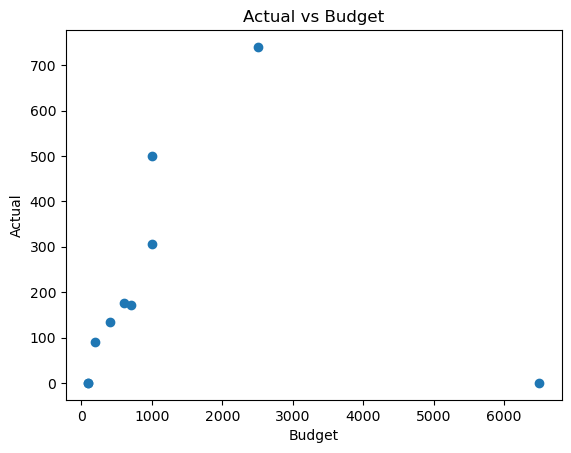

In [10]:
# Scatter plots of actual vs budget
# This will help us to see if we are under or over budget spending

plt.scatter(df['Budget'], df['Actual'])
plt.xlabel('Budget')
plt.ylabel('Actual')
plt.title('Actual vs Budget')
plt.show()

 From the above we can see that most of the actual spent are way less than the total budget

In [11]:
# Grouping our leads by type of media and market

leads_by_silo = df.groupby('Silo')['Ad-Leads'].sum()
leads_by_market = df.groupby('Market')['Ad-Leads'].sum()

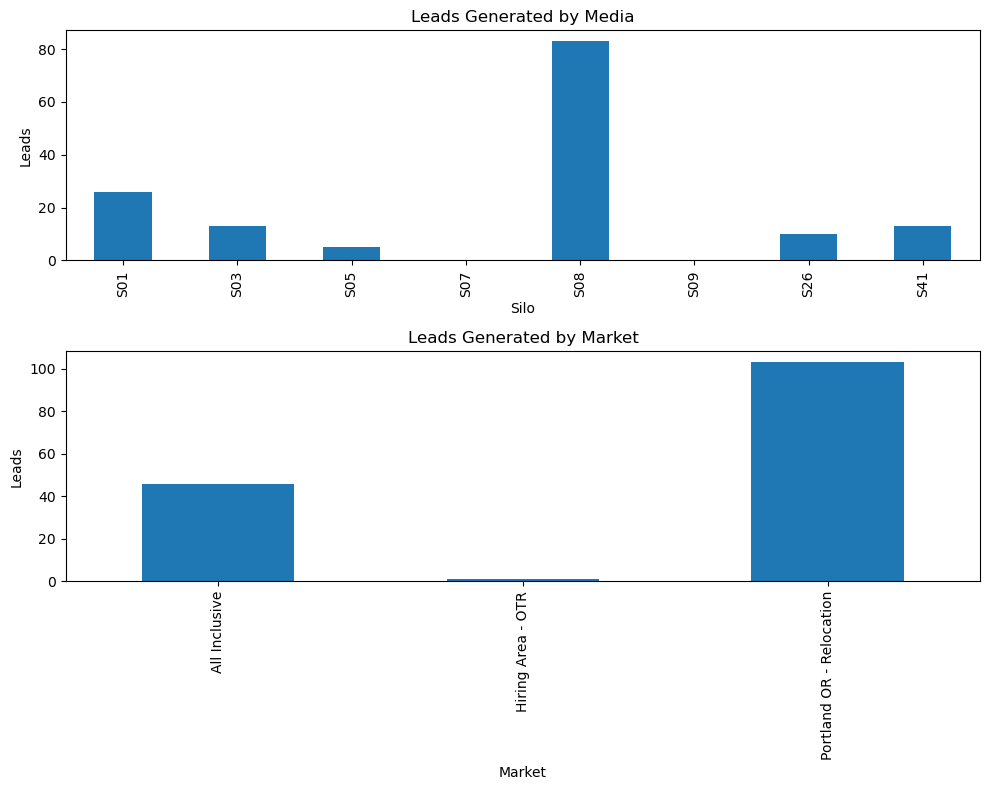

In [12]:
# Plotting bar chart of the leads
# This will help us see market and media effect on leads

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
leads_by_silo.plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Silo')
ax[0].set_ylabel('Leads')
ax[0].set_title('Leads Generated by Media')

leads_by_market.plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Market')
ax[1].set_ylabel('Leads')
ax[1].set_title('Leads Generated by Market')

plt.tight_layout()
plt.show()

In [13]:
# Grouping the leads by status, market and media type

leads_by_status_silo = df.groupby(['Status', 'Silo'])['Ad-Leads'].sum().unstack()
leads_by_status_market = df.groupby(['Status', 'Market'])['Ad-Leads'].sum().unstack()

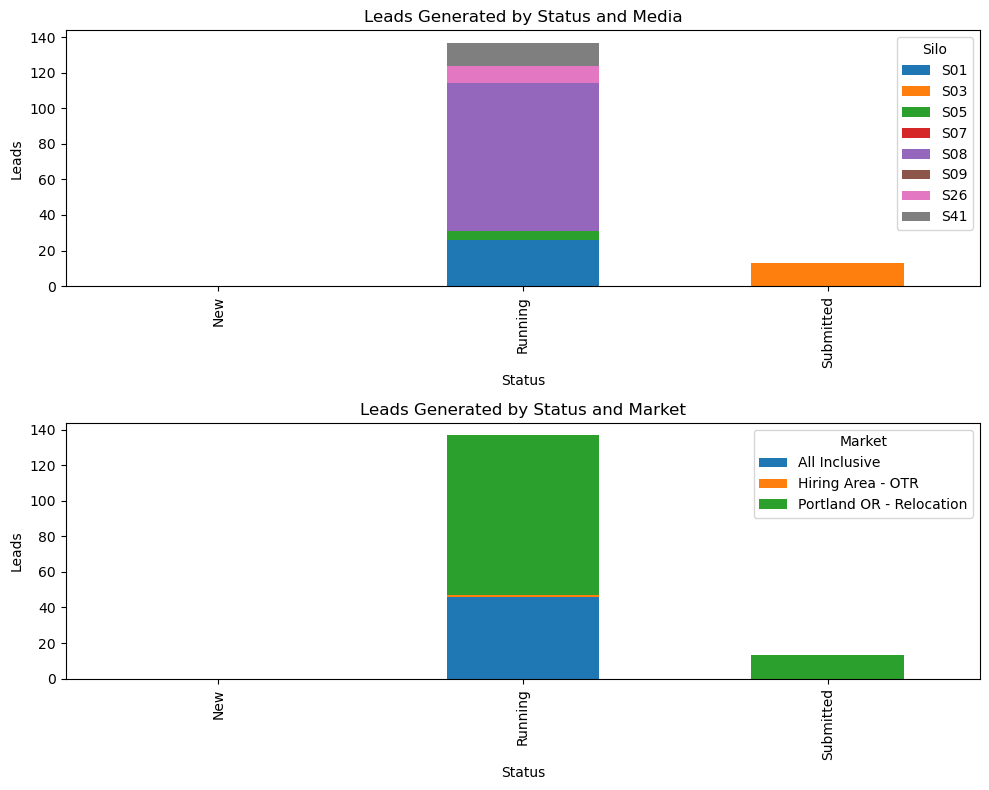

In [14]:
# Plot to display leads generated by status, media type and market

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
leads_by_status_silo.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Leads')
ax[0].set_title('Leads Generated by Status and Media')

leads_by_status_market.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_xlabel('Status')
ax[1].set_ylabel('Leads')
ax[1].set_title('Leads Generated by Status and Market')

plt.tight_layout()
plt.show()


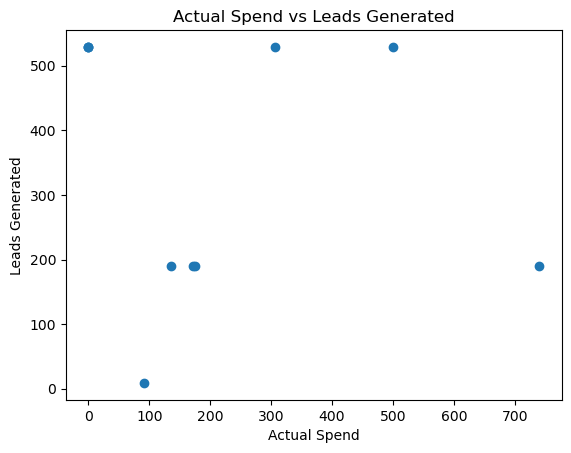

In [15]:
# Checking how our spent budget is creating a lead
# This will help us identify how we are actually speding for leads

plt.scatter(df['Actual'],df['Leads'])
plt.xlabel('Actual Spend')
plt.ylabel('Leads Generated')
plt.title('Actual Spend vs Leads Generated')
plt.show()

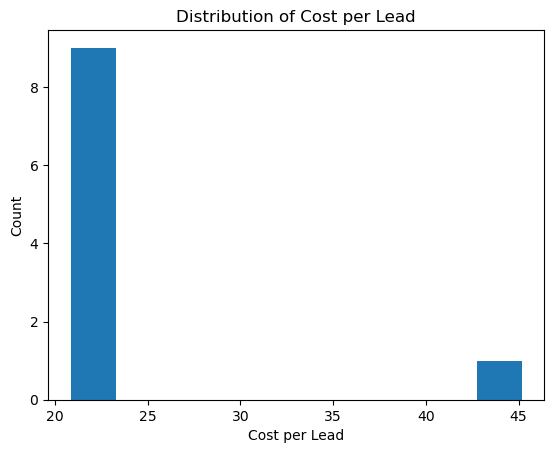

In [16]:
# Checking the distribution of cost per lead
# This will help us identify how we are spending per lead averagely

plt.hist(df['CPL-G'])
plt.xlabel('Cost per Lead')
plt.ylabel('Count')
plt.title('Distribution of Cost per Lead')
plt.show()

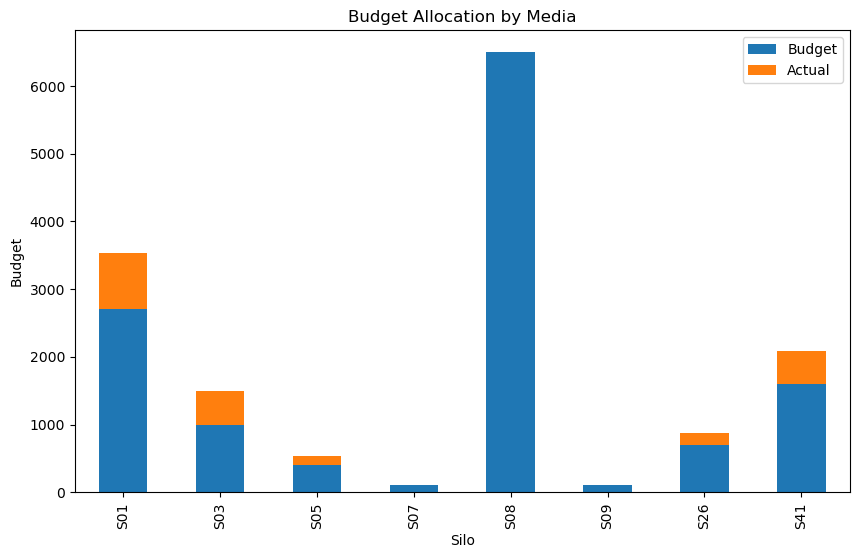

In [17]:
# Group by media or Market and sum the budget components
grouped = df.groupby('Silo')[['Budget', 'Actual']].sum()

# Plot stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10,6))

# Set plot title and axis labels
ax.set_title('Budget Allocation by Media')
ax.set_xlabel('Silo')
ax.set_ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='Client'>

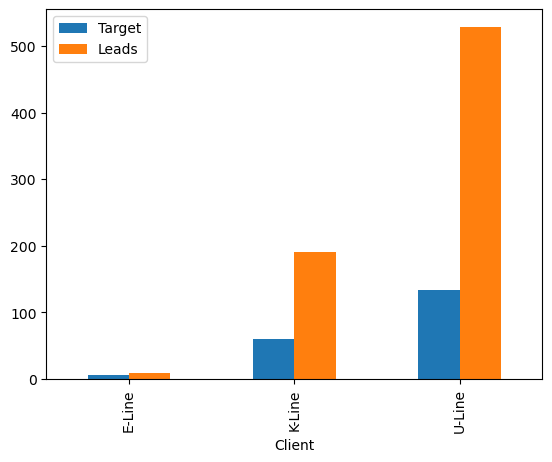

In [18]:
# Displaying the success rate per client

target_df = df.groupby('Client')['Target','Leads'].mean()
target_df.plot(kind='bar')